In [1]:
import pandas as pd
from settings import *
from scrape import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#scrapePage(anacUrl)

In [10]:
situacaoVoos = []
fileCsvFinal = pd.DataFrame()
for z in range(2015, 2020):
    ano = z - 2015
    print(f"Lendo os arquivos do ano {z}")
    for i in range(1, 13):
            sep = [';', ',','\t']
            sepIndex = 0
            while True:
                try:
                    fileCsv = pd.read_csv(
                        f'data/{z}-{i:02}.csv', encoding='ISO-8859-1', sep=sep[sepIndex], low_memory=False)
                    if ('internet' in fileCsv.columns[0]):
                        fileCsv.columns = fileCsv.iloc[0]
                        fileCsv = fileCsv[1:]
                    if len(fileCsv.columns) <= 1:
                        raise ValueError('sepIndex')
                    else:
                        try:
                            fileCsv = fileCsv.drop(columns='Data Prevista')
                        except:
                            pass
                        fileCsv.columns = ['ICAO Empresa Aérea', 'Número Voo', 'Código DI', 'Código Tipo Linha',
                                        'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino', 'Partida Prevista',
                                        'Partida Real', 'Chegada Prevista', 'Chegada Real', 'Situação Voo',
                                        'Código Justificativa']
                    fileCsvFinal = pd.concat([fileCsvFinal, fileCsv])
                    print(len(fileCsvFinal))
                    break
                except Exception as e:
                    if e.args[0] == 'sepIndex':
                        if (sepIndex < 3):
                            sepIndex += 1
                    else:
                        print(e)

Lendo os arquivos do ano 2015
114636
216629
327636
434556
542910
648608
760762
868806
976224
1085370
1189754
1301570
Lendo os arquivos do ano 2016
1415829
1517497
1619362
1718322
1810178
1898218
1990804
2082306
2168746
2258370
2345436
2440576
Lendo os arquivos do ano 2017
2539374
2624374
2716233
2802437
2893114
2980986
3077896
3172081
3261534
3355080
3446623
3546060
Lendo os arquivos do ano 2018
3649557
3739167
3829956
3909737
3993491
4073793
4164009
4248397
4329316
4412963
4492988
4580616
Lendo os arquivos do ano 2019
4672433
4751959
4835021
4912465
4989166
5063355
5149027
5229616
5310153
5394392
5475390
5563607


In [49]:
situacao = fileCsvFinal['Situação Voo'].str.upper()
situacaoVoos = situacao.value_counts()

In [50]:
situacaoVoos

REALIZADO        5077785
CANCELADO         484230
NÃO REALIZADO       1592
Name: Situação Voo, dtype: int64

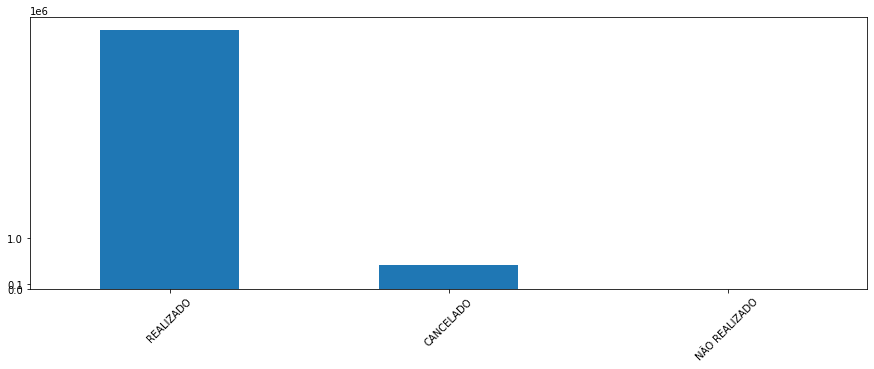

In [52]:

fig, axs = plt.subplots(figsize=(15, 5))
situacaoVoos.plot(kind='bar')
plt.xticks(rotation=50)
labels = axs.get_xticklabels()
for label in labels:
    label.set_rotation(45)
plt.setp(axs,
yticks=[0, 100000, 1000000])
plt.show()

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
plt.plot(voos)
xticks = []
ano = 2015
for i in range(len(voos)):
    label = f"{ano}-{i%12 + 1}"
    if i%12 == 11: ano+=1
    xticks.append(label)
axs.set_xticks(range(0,len(voos),1))
axs.set_xticklabels(xticks, rotation=45)
plt.show()

In [ ]:

df = pd.merge(situacaoVoos[0], situacaoVoos[1], right_index = True, left_index=True)
for i in range(5):
    df = pd.merge(df, situacaoVoos[i+2], right_index = True, left_index=True)
situacaoVoos[8]